<a href="https://colab.research.google.com/github/KESHAVACHINNA/-KESHAVACHINNA-green-destination-project-/blob/main/ExactSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


 Dataset loaded successfully!
 Attempted to convert columns to numeric.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377719 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    376399 non-null  float64
 1   Cyclone_Material_Temp     376128 non-null  float64
 2   Cyclone_Outlet_Gas_draft  376398 non-null  float64
 3   Cyclone_cone_draft        376399 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   376398 non-null  float64
 5   Cyclone_Inlet_Draft       376397 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB
None
 Data cleaned and indexed at 5-minute intervals.
                     Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
time                                                                 
2017-01-01 00:00:00                  867.63                 910.42   
2017-01-01 00:05:00            

/tmp/ipython-input-410692679.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.asfreq('5T')
/tmp/ipython-input-410692679.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
/tmp/ipython-input-410692679.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)



Outlier counts per column:
 [0 0 0 3 0 2]

Summary statistics:
        Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count           378580.000000          378580.000000   
mean               726.371944             749.755421   
std                329.453074             351.752430   
min                  0.000000            -185.000000   
25%                856.000000             867.280000   
50%                882.320000             913.170000   
75%                901.030000             943.510000   
max               1157.630000            1375.000000   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count             378580.000000       378580.000000            378580.000000   
mean                -177.567744         -164.362696               714.809463   
std                   99.300974           90.240786               326.103911   
min                 -456.660000         -459.310000                13.790000   
25%                 -247.08000

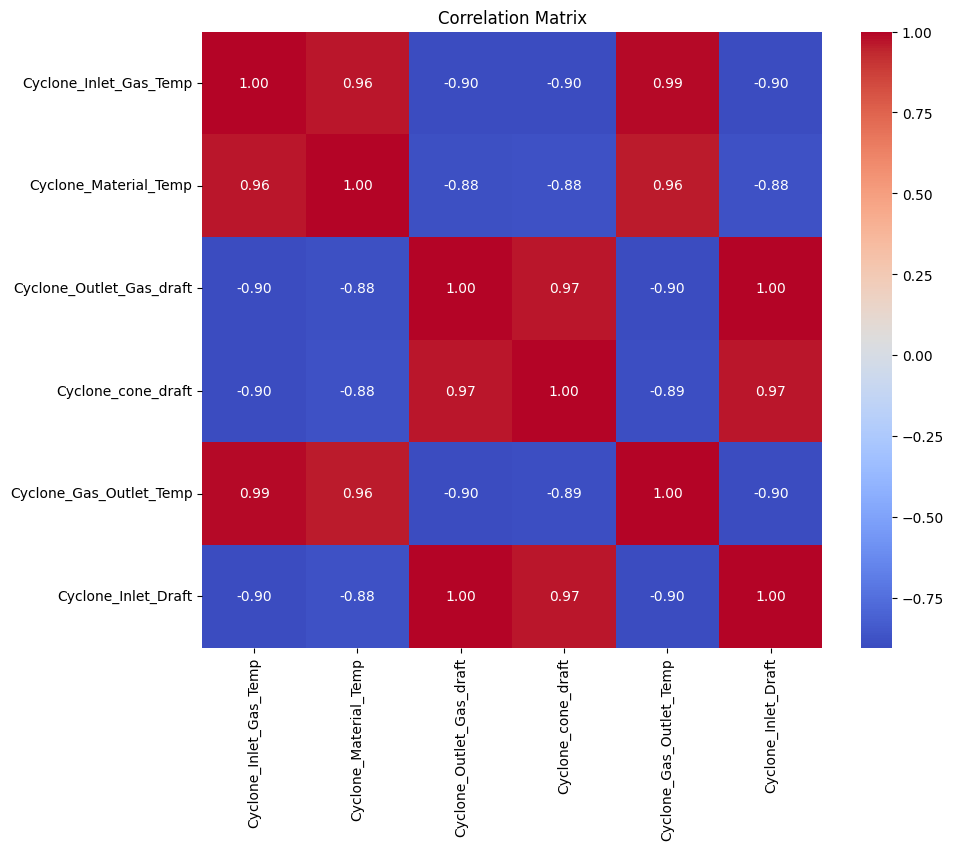

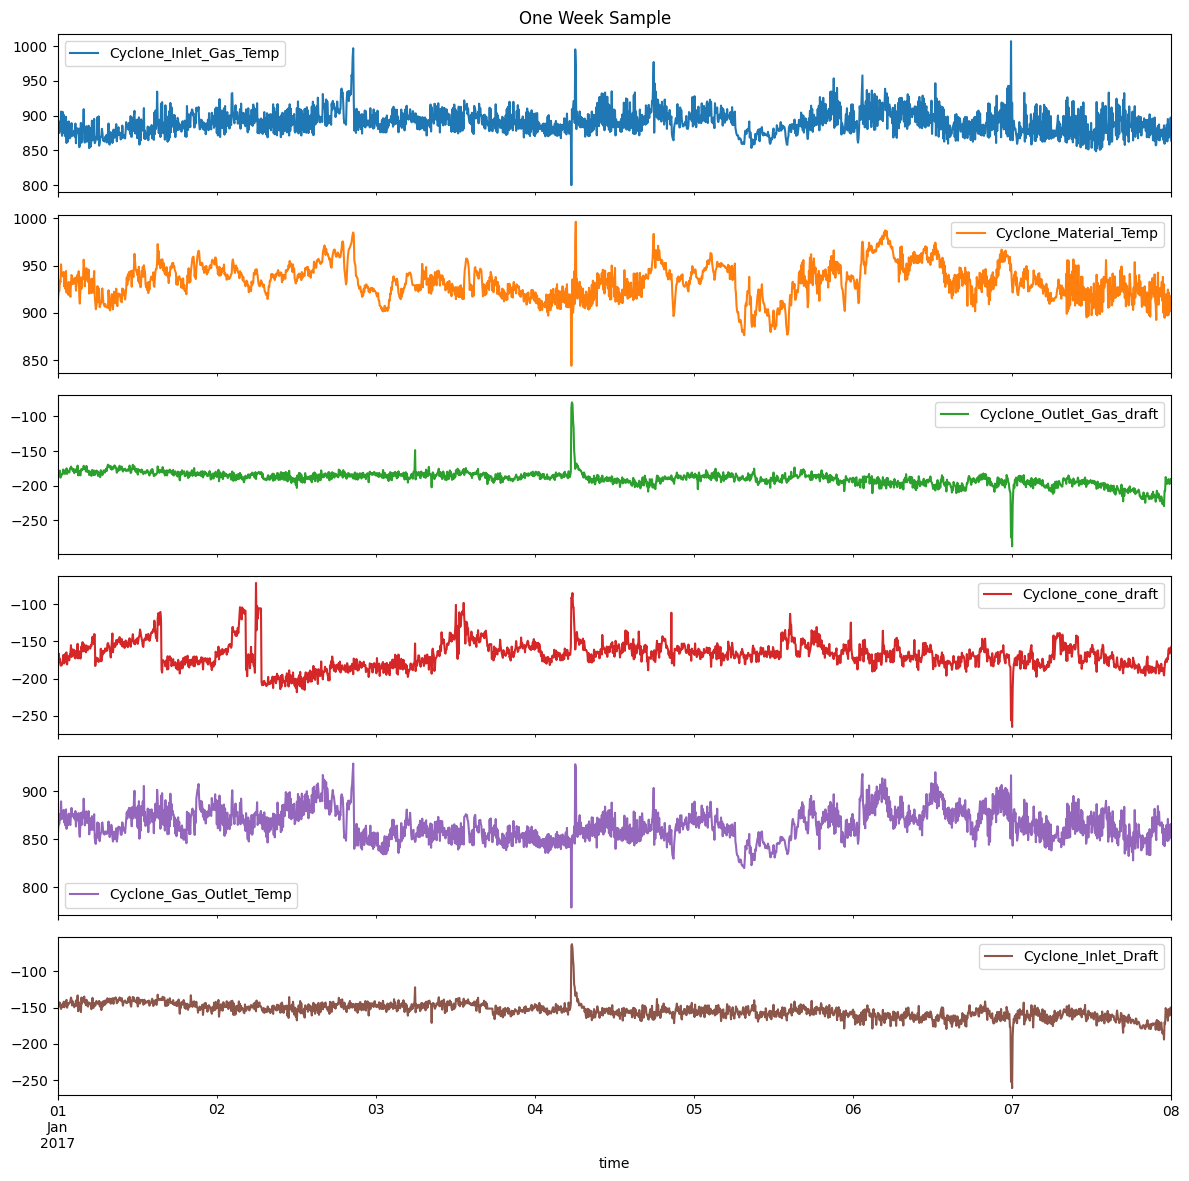

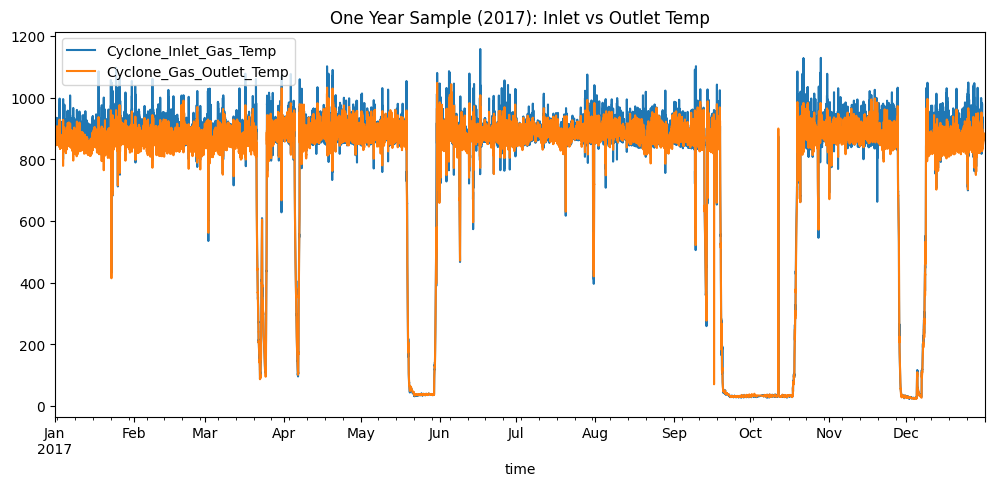

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:

    df = pd.read_excel('/content/read_csv.xlsx', parse_dates=['time'], index_col='time')
    print(" Dataset loaded successfully!")


    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print(" Attempted to convert columns to numeric.")
    print(df.info())


    df = df.asfreq('5T')


    df.interpolate(method='time', inplace=True)

    df.fillna(method='bfill', inplace=True)
    df.fillna(method='ffill', inplace=True)

    print(" Data cleaned and indexed at 5-minute intervals.")
    print(df.head())


    from scipy.stats import zscore
    num_cols = df.select_dtypes(include=[np.number]).columns

    z_scores = np.abs(zscore(df[num_cols]))

    outlier_counts = (z_scores > 3).sum(axis=0)
    print("\nOutlier counts per column:\n", outlier_counts)


    print("\nSummary statistics:\n", df.describe())

    corr = df[num_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


    if not df.empty:
        start_date_week = df.index.min()
        end_date_week = start_date_week + pd.Timedelta(days=7)
        one_week = df.loc[start_date_week:end_date_week]

        if not one_week.empty:
            one_week.plot(subplots=True, figsize=(12, 12), title="One Week Sample")
            plt.tight_layout()
            plt.show()
        else:
            print("\nCould not create one week sample plot: Data slice is empty. Adjust the date range for 'one_week'.")
    else:
        print("\nCould not create one week sample plot: DataFrame is empty.")



    if not df.empty:
        first_year = df.index.year.min()
        one_year = df[df.index.year == first_year]

        if not one_year.empty:
            cols_to_plot_year = ['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp']
            cols_to_plot_year_exist = [col for col in cols_to_plot_year if col in one_year.columns]

            if cols_to_plot_year_exist:
                 one_year[cols_to_plot_year_exist].plot(figsize=(12, 5))
                 plt.title(f"One Year Sample ({first_year}): Inlet vs Outlet Temp")
                 plt.show()
            else:
                 print(f"\nCould not create one year sample plot: Specified columns {cols_to_plot_year} not found in the DataFrame.")
        else:
            print(f"\nCould not create one year sample plot: Data slice for year {first_year} is empty. Adjust the year for 'one_year'.")
    else:
         print("\nCould not create one year sample plot: DataFrame is empty.")


except FileNotFoundError:
    print(" Error: '/content/read_csv.xlsx' not found. Please make sure the file is in the correct directory.")
    df = pd.DataFrame()
except Exception as e:
    print(f"An error occurred: {e}")
    df = pd.DataFrame()

/tmp/ipython-input-2688114426.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  starts = df.index[df['is_shutdown'] & ~df['is_shutdown'].shift(1).fillna(False)]
/tmp/ipython-input-2688114426.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ends = df.index[~df['is_shutdown'] & df['is_shutdown'].shift(1).fillna(False)]


 Shutdown periods detected and segmented successfully.

 Shutdown Analysis Results:
Total number of shutdown events: 36
Total calculated downtime: 217 days 11:45:00

 Results saved to 'shutdown_periods.csv'


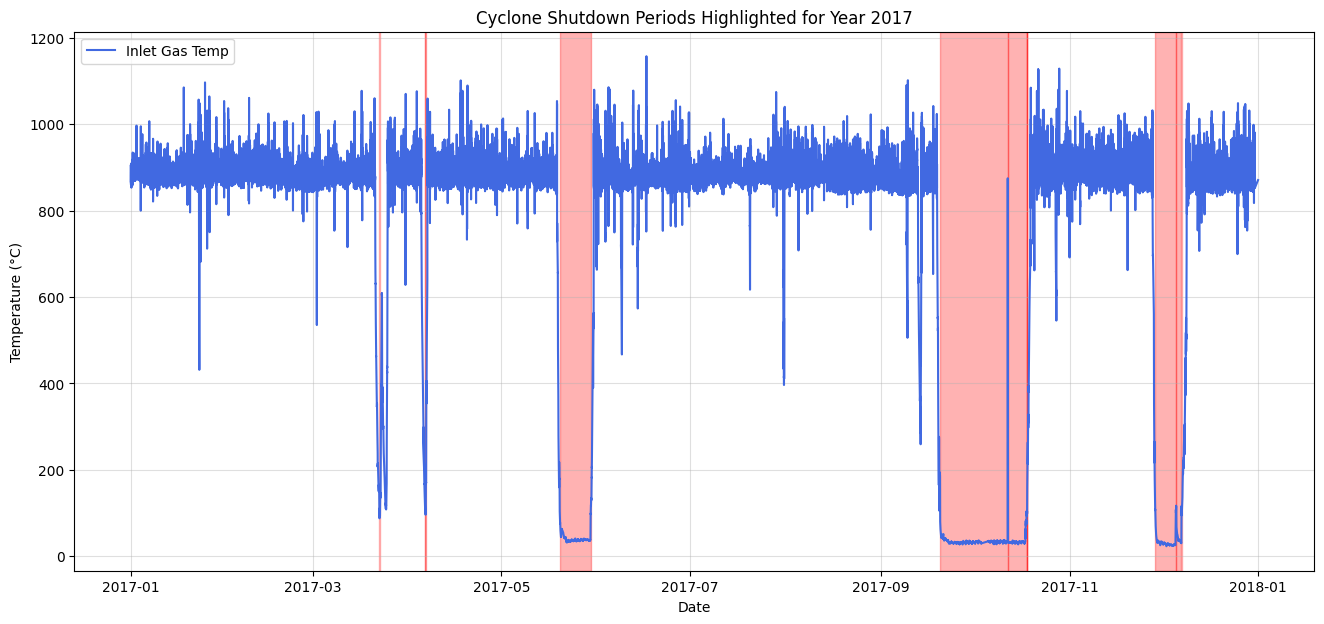

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'df' in locals() and not df.empty:


    SHUTDOWN_THRESHOLD = 100
    df['is_shutdown'] = df['Cyclone_Inlet_Gas_Temp'] < SHUTDOWN_THRESHOLD

    shutdown_periods = []
    starts = df.index[df['is_shutdown'] & ~df['is_shutdown'].shift(1).fillna(False)]
    ends = df.index[~df['is_shutdown'] & df['is_shutdown'].shift(1).fillna(False)]

    if df['is_shutdown'].iloc[0]:
        starts = pd.to_datetime([df.index[0]]) | starts
    if df['is_shutdown'].iloc[-1]:
        ends = ends | pd.to_datetime([df.index[-1]])

    if len(starts) == len(ends):
        shutdowns_df = pd.DataFrame({'start_time': starts, 'end_time': ends})
        shutdowns_df['duration'] = shutdowns_df['end_time'] - shutdowns_df['start_time']
        print(" Shutdown periods detected and segmented successfully.")


        total_downtime = shutdowns_df['duration'].sum()
        num_shutdown_events = len(shutdowns_df)

        print("\n Shutdown Analysis Results:")
        print(f"Total number of shutdown events: {num_shutdown_events}")
        print(f"Total calculated downtime: {total_downtime}")

        shutdowns_df.to_csv('shutdown_periods.csv', index=False)
        print("\n Results saved to 'shutdown_periods.csv'")


        year_to_plot = df.index.min().year
        one_year_data = df[df.index.year == year_to_plot]
        shutdowns_in_year = shutdowns_df[shutdowns_df['start_time'].dt.year == year_to_plot]

        plt.figure(figsize=(16, 7))
        plt.plot(one_year_data.index, one_year_data['Cyclone_Inlet_Gas_Temp'],
                 label='Inlet Gas Temp', color='royalblue', zorder=2)

        for _, row in shutdowns_in_year.iterrows():
            plt.axvspan(row['start_time'], row['end_time'], color='red', alpha=0.3, zorder=1)

        plt.title(f'Cyclone Shutdown Periods Highlighted for Year {year_to_plot}')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.grid(alpha=0.4)
        plt.show()

else:
    print(" DataFrame 'df' not found. Please run the Data Preparation step first.")

Using 315943 data points from active operation for clustering.


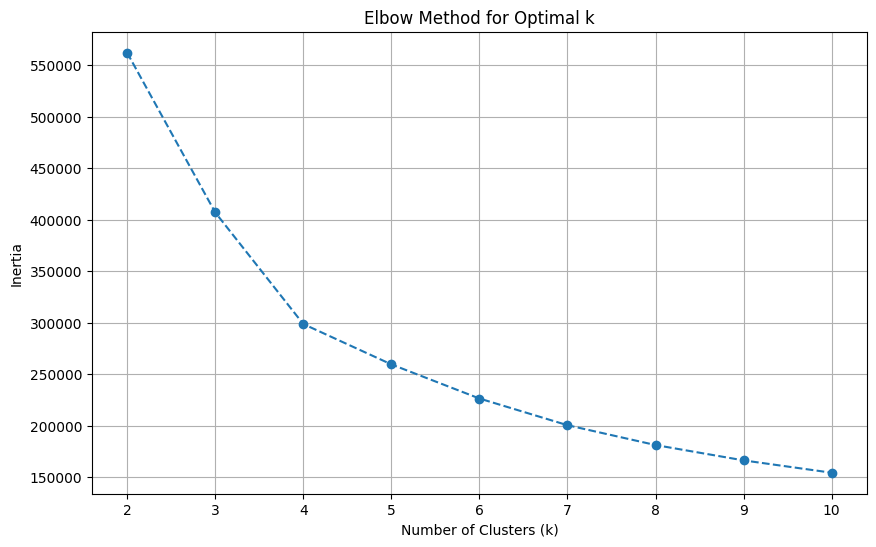


Proceeding with k=4 clusters based on the elbow plot.

 Summary Statistics per Cluster/State:
cluster                                  0           1            2  \
Cyclone_Inlet_Gas_Temp   mean   888.034248  280.120599   654.380870   
                         std     27.407197  121.899556   136.998737   
                         min    100.000000  100.000000   100.000000   
                         max   1157.630000  707.160000  1081.030000   
Cyclone_Material_Temp    mean   918.731392  163.304967   690.856138   
                         std     73.175706  141.638070   238.291625   
                         min   -185.000000 -185.000000     0.000000   
                         max   1375.000000  900.000000  1374.980000   
Cyclone_Outlet_Gas_draft mean  -198.713826    1.962517    -1.338862   
                         std     25.230745   12.531868    26.701530   
                         min   -291.590000  -97.390000  -184.190000   
                         max      5.530000   38.11000

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

if 'df' in locals() and not df.empty:

    active_df = df[~df['is_shutdown']].copy()
    active_df.drop(columns=['is_shutdown'], inplace=True)

    print(f"Using {len(active_df)} data points from active operation for clustering.")


    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(active_df)
    scaled_df = pd.DataFrame(scaled_features, index=active_df.index, columns=active_df.columns)

    inertia = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans_test = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans_test.fit(scaled_df)
        inertia.append(kmeans_test.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    chosen_k = 4
    print(f"\nProceeding with k={chosen_k} clusters based on the elbow plot.")

    kmeans = KMeans(n_clusters=chosen_k, n_init=10, random_state=42)
    active_df['cluster'] = kmeans.fit_predict(scaled_df)

    print("\n Summary Statistics per Cluster/State:")
    cluster_summary_stats = active_df.groupby('cluster').agg(['mean', 'std', 'min', 'max']).transpose()
    print(cluster_summary_stats)

    clusters_summary_csv = active_df.groupby('cluster').agg(['mean', 'std'])
    clusters_summary_csv.to_csv('clusters_summary.csv')
    print("\n Cluster summary statistics saved to 'clusters_summary.csv'")

    print("\n Calculating Frequency and Duration Statistics...")

    state_frequency = active_df['cluster'].value_counts(normalize=True).sort_index()
    print("\nState Frequency (as % of active time):")
    print(state_frequency)


    state_changes = active_df['cluster'].diff().ne(0)
    state_block_ids = state_changes.cumsum()
    durations = active_df.groupby(state_block_ids).apply(lambda x: x.index[-1] - x.index[0])
    block_clusters = active_df.groupby(state_block_ids)['cluster'].first()
    duration_df = pd.DataFrame({'cluster': block_clusters, 'duration': durations})

    duration_summary = duration_df.groupby(duration_df['cluster'])['duration'].agg(['mean', 'count'])
    duration_summary.rename(columns={'mean': 'average_duration', 'count': 'number_of_occurrences'}, inplace=True)

    print("\nState Duration and Occurrence Summary:")
    print(duration_summary)

else:
    print(" DataFrame 'df' not found. Please run the previous steps first.")

 Starting contextual anomaly detection...
  - Training Isolation Forest for Cluster 0...
  - Training Isolation Forest for Cluster 1...
  - Training Isolation Forest for Cluster 2...
  - Training Isolation Forest for Cluster 3...

 Detection complete. Found 29468 anomalous data points.

 Consolidating anomalous points into events...
 Anomalous periods saved to 'anomalous_periods.csv'
              start_time            end_time         duration  cluster_id  \
1112 2017-09-20 00:45:00 2017-10-11 22:50:00 21 days 22:05:00           1   
3235 2018-05-16 21:20:00 2018-05-17 21:15:00  0 days 23:55:00           2   
3026 2018-04-28 05:00:00 2018-04-29 01:50:00  0 days 20:50:00           3   
6124 2019-02-17 03:50:00 2019-02-17 23:15:00  0 days 19:25:00           0   
8837 2020-03-07 15:00:00 2020-03-08 08:00:00  0 days 17:00:00           3   

           implicated_variable  
1112     Cyclone_Material_Temp  
3235       Cyclone_Inlet_Draft  
3026  Cyclone_Outlet_Gas_draft  
6124    Cyclone_In

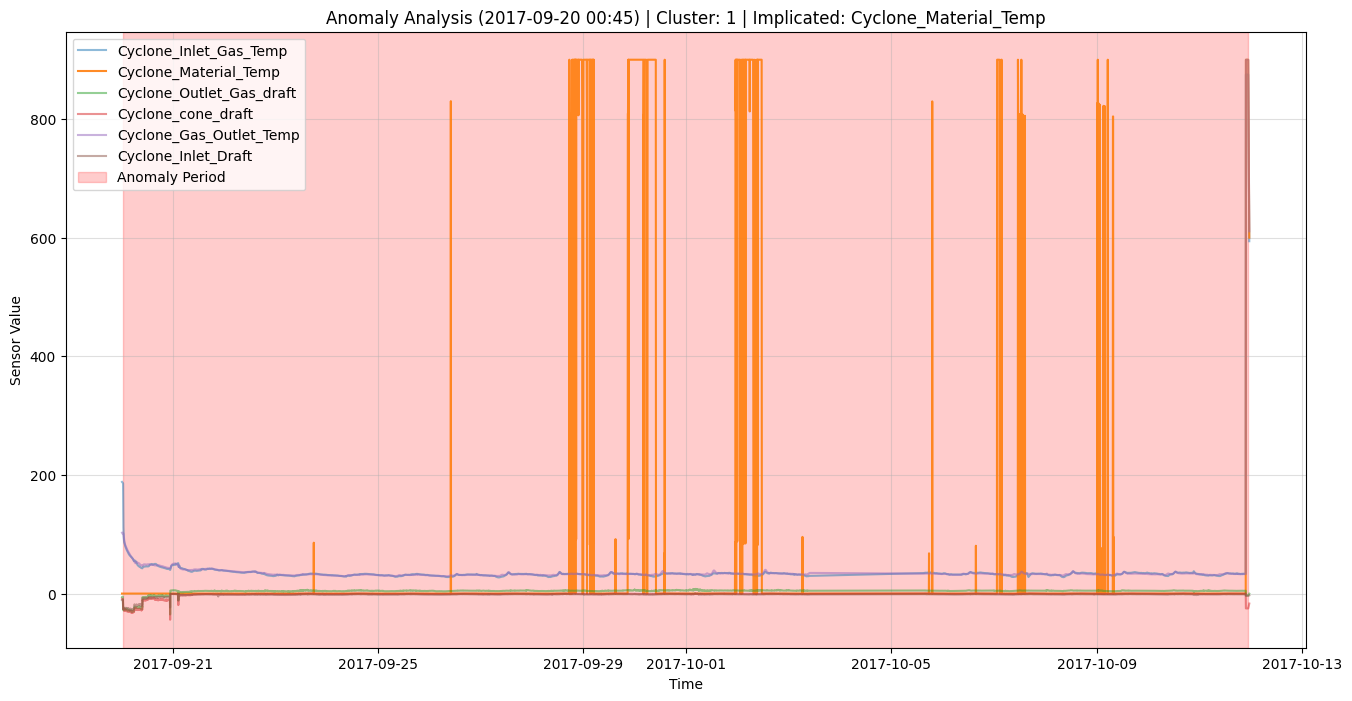

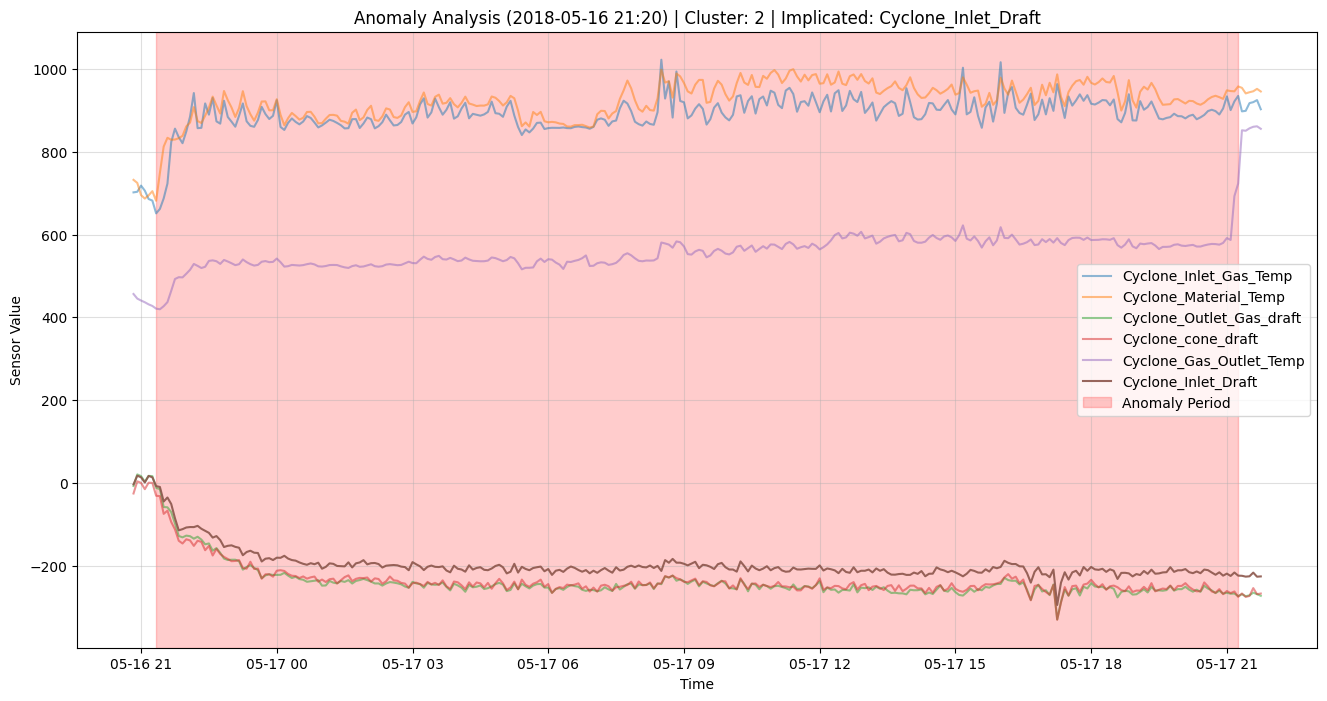

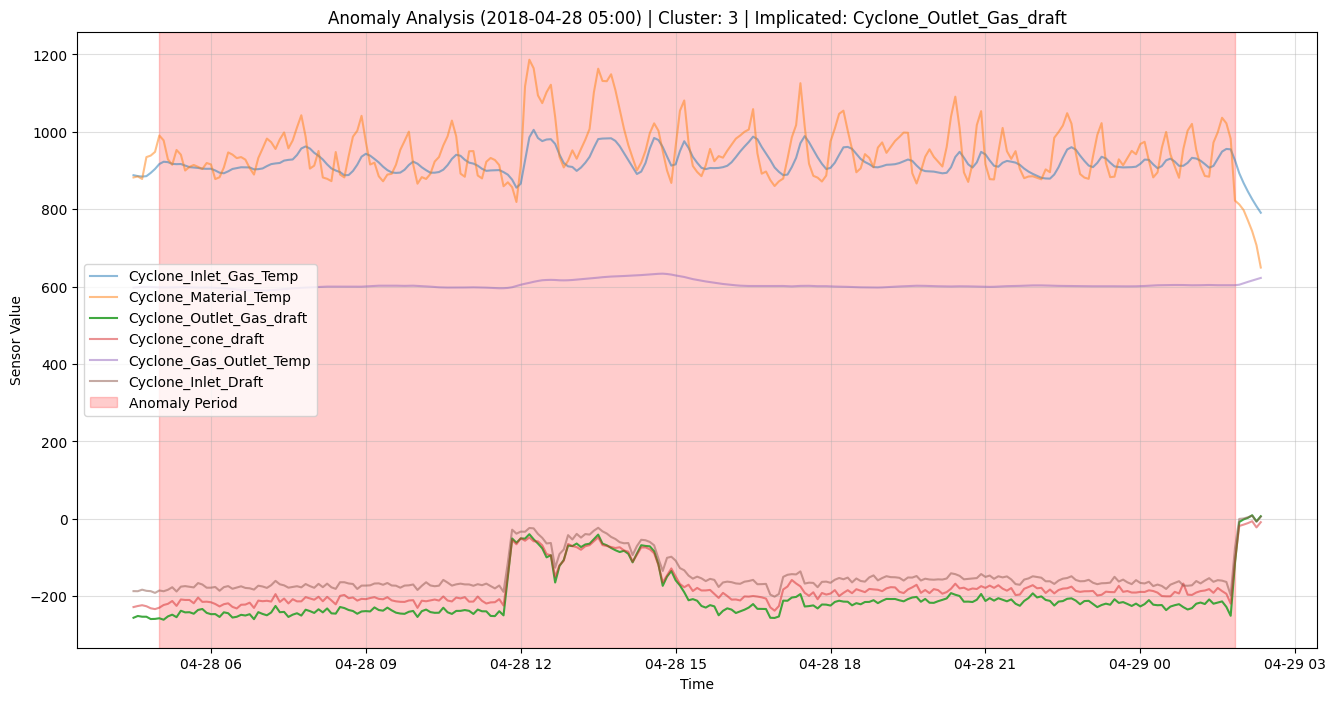

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

if 'active_df' in locals() and not active_df.empty:


    print(" Starting contextual anomaly detection...")
    active_df['is_anomaly'] = 0
    feature_cols = [col for col in active_df.columns if col not in ['cluster', 'is_anomaly']]

    for cluster_id in sorted(active_df['cluster'].unique()):
        cluster_data = active_df[active_df['cluster'] == cluster_id][feature_cols]
        if not cluster_data.empty:
            print(f"  - Training Isolation Forest for Cluster {cluster_id}...")
            iso_forest = IsolationForest(contamination='auto', random_state=42)
            iso_forest.fit(cluster_data)
            predictions = iso_forest.predict(cluster_data)
            anomaly_indices = cluster_data.index[predictions == -1]
            active_df.loc[anomaly_indices, 'is_anomaly'] = 1

    num_anomalies = active_df['is_anomaly'].sum()
    print(f"\n Detection complete. Found {num_anomalies} anomalous data points.")


    print("\n Consolidating anomalous points into events...")
    anomaly_changes = active_df['is_anomaly'].diff().ne(0)
    event_ids = anomaly_changes.cumsum()
    anomaly_events = active_df[active_df['is_anomaly'] == 1]

    anomalous_periods = []
    for event_id, event_group in anomaly_events.groupby(event_ids):
        start_time = event_group.index.min()
        end_time = event_group.index.max()
        duration = end_time - start_time
        cluster_id = event_group['cluster'].iloc[0]

        cluster_stats = active_df[active_df['cluster'] == cluster_id][feature_cols].agg(['mean', 'std'])
        event_zscores = (event_group[feature_cols] - cluster_stats.loc['mean']) / cluster_stats.loc['std']
        most_implicated_var = event_zscores.abs().max().idxmax()

        anomalous_periods.append([start_time, end_time, duration, cluster_id, most_implicated_var])

    anomalous_periods_df = pd.DataFrame(
        anomalous_periods,
        columns=['start_time', 'end_time', 'duration', 'cluster_id', 'implicated_variable']
    )

    anomalous_periods_df.to_csv('anomalous_periods.csv', index=False)
    print(" Anomalous periods saved to 'anomalous_periods.csv'")
    print(anomalous_periods_df.sort_values(by='duration', ascending=False).head())



    def visualize_anomaly(anomaly_event, context_minutes=30):
        start, end, cluster, implicated_var = anomaly_event[['start_time', 'end_time', 'cluster_id', 'implicated_variable']]
        plot_start, plot_end = start - pd.Timedelta(minutes=context_minutes), end + pd.Timedelta(minutes=context_minutes)
        context_data = df.loc[plot_start:plot_end]

        plt.figure(figsize=(16, 8))
        for col in feature_cols:
            plt.plot(context_data.index, context_data[col], label=col, alpha=0.9 if col == implicated_var else 0.5, zorder=2)

        plt.axvspan(start, end, color='red', alpha=0.2, label='Anomaly Period', zorder=1)
        plt.title(f"Anomaly Analysis ({start.strftime('%Y-%m-%d %H:%M')}) | Cluster: {cluster} | Implicated: {implicated_var}")
        plt.xlabel('Time'); plt.ylabel('Sensor Value'); plt.legend(); plt.grid(True, alpha=0.4); plt.show()

    print("\n Visualizing the 3 longest-duration anomalies for analysis...")
    for i, anomaly in anomalous_periods_df.sort_values(by='duration', ascending=False).head(3).iterrows():
        visualize_anomaly(anomaly)
else:
    print(" DataFrame 'active_df' not found. Please run the clustering step first.")

In [ ]:
!pip uninstall pmdarima -y
!pip install pmdarima

# After reinstalling pmdarima, please restart the runtime again for the changes to take effect.
# Then, try running the cell with the ARIMA model again.

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


In [ ]:
pip uninstall pmdarima -y


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [ ]:
pip install --no-cache-dir pmdarima


Data split: Using recent 105120 points for training, 288 for testing.

Training Random Forest Regressor...
✅ Model training completed in 114.15 seconds.

--- Forecast Evaluation (Next 24 Hours) ---
  Persistence Model     -> RMSE: 15.72, MAE: 13.47
  Random Forest Model   -> RMSE: 12.05, MAE: 9.87

Forecasts saved to 'forecasts.csv'


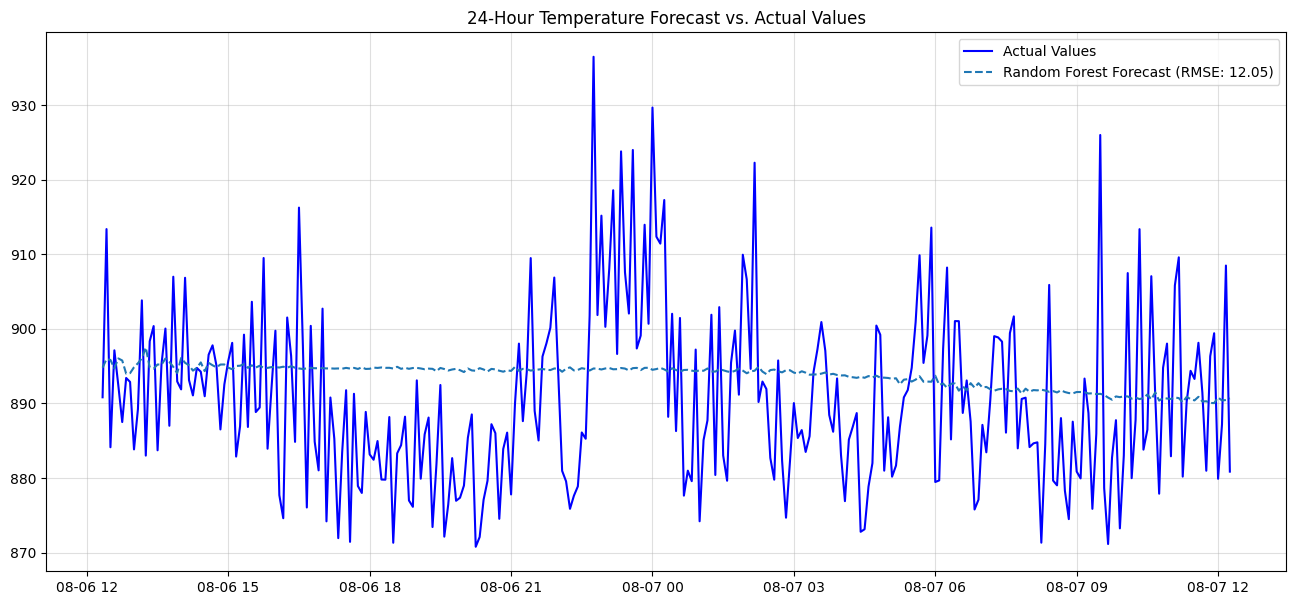

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import time # Import time to measure execution duration

# This code assumes the 'df' DataFrame from Task 1 is already prepared.
if 'df' in locals() and not df.empty:

    # 1. Prepare Data
    target_variable = 'Cyclone_Inlet_Gas_Temp'
    series = df[target_variable]

    # --- CHANGE 1: Use only the last year of data for training for faster performance ---
    training_period_days = 365
    training_points = training_period_days * 24 * 12

    # Split data: train on the last year, test on the last 24 hours
    test_points = 24 * 12
    train_data = series[-(training_points + test_points) : -test_points] # Use slice for recent data
    test_data = series[-test_points:]

    print(f"Data split: Using recent {len(train_data)} points for training, {len(test_data)} for testing.")

    # 2. Method 1: Persistence Baseline Forecast
    last_known_value = train_data.iloc[-1]
    forecast_index = test_data.index
    persistence_forecast = pd.Series([last_known_value] * len(test_data), index=forecast_index)

    # 3. Method 2: Random Forest Regressor
    print("\nTraining Random Forest Regressor...")
    start_time = time.time() # Start timer

    n_lags = 12 # Use the last hour of data to predict the next point
    X, y = [], []
    if len(train_data) > n_lags:
        for i in range(len(train_data) - n_lags):
            X.append(train_data.iloc[i:i+n_lags].values)
            y.append(train_data.iloc[i+n_lags])

        X_train, y_train = np.array(X), np.array(y)

        # --- CHANGES 2 & 3: Reduce trees and use all CPU cores ---
        rf_model = RandomForestRegressor(
            n_estimators=50,   # Reduced from 100
            random_state=42,
            n_jobs=-1          # Use all available CPU cores
        )
        rf_model.fit(X_train, y_train)

        end_time = time.time() # End timer
        print(f"✅ Model training completed in {end_time - start_time:.2f} seconds.")

        # --- Perform iterative forecasting ---
        rf_forecast = []
        last_window = train_data.iloc[-n_lags:].values
        for _ in range(len(test_data)):
            next_pred = rf_model.predict(last_window.reshape(1, -1))[0]
            rf_forecast.append(next_pred)
            last_window = np.append(last_window[1:], next_pred)

        rf_forecast = pd.Series(rf_forecast, index=forecast_index)

        # 4. Evaluate and visualize as before...
        actual_values = test_data
        persistence_rmse = np.sqrt(mean_squared_error(actual_values, persistence_forecast))
        persistence_mae = mean_absolute_error(actual_values, persistence_forecast)
        rf_rmse = np.sqrt(mean_squared_error(actual_values, rf_forecast))
        rf_mae = mean_absolute_error(actual_values, rf_forecast)

        print("\n--- Forecast Evaluation (Next 24 Hours) ---")
        print(f"  Persistence Model     -> RMSE: {persistence_rmse:.2f}, MAE: {persistence_mae:.2f}")
        print(f"  Random Forest Model   -> RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

        forecasts_df = pd.DataFrame({
            'actual': actual_values,
            'persistence_forecast': persistence_forecast,
            'random_forest_forecast': rf_forecast
        })
        forecasts_df.to_csv('forecasts.csv')
        print("\nForecasts saved to 'forecasts.csv'")

        plt.figure(figsize=(16, 7))
        plt.title('24-Hour Temperature Forecast vs. Actual Values')
        plt.plot(actual_values.index, actual_values, label='Actual Values', color='blue')
        plt.plot(rf_forecast.index, rf_forecast, label=f'Random Forest Forecast (RMSE: {rf_rmse:.2f})', linestyle='--')
        plt.legend(); plt.grid(alpha=0.4); plt.show()
    else:
        print("Not enough training data.")
else:
    print("DataFrame 'df' not found. Please run the previous steps first.")